**These are the libraries that we will use for the following code of the iris flower**

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [83]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


**We can see the value of the DESCR keys in a description of the data used, giving the beginning of the explanation as the length and width of the petals and the length and width of the sepals, all**

In [84]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [85]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


**here we are going to identify the species of the plant depending on the image and the value of the targt_names key**

In [86]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**In this part of the program we can decode the data with those previously obtained on the iris flower, we can in turn know the data of the measurements of the length of the sepal, the width of the sepal, the length of the petal and the width of the petal in a NumPy**

In [87]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


**In this part we will put the data corresponding to the iris flower in columns because there are four measurements that should be taken into account in each of the flowers.**

In [88]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


**Here we can have the measurements for 150 different flowers, just by having the necessary data you can recognize the 150 flowers as long as the values you ask are mine or the ones closest to them**

In [89]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


**As we can see, the above data allows us to see that the five main flowers have a similarity, but the first flower has a sepal of 5.1 cm. **

In [90]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


**here we can see the flower data but one-dimensional with the flower input**

In [91]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


**flower types are separated by integers from 0 to 2**

In [92]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Here we will find the function in percentage of output and from 75% to 25% of the different plants**

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [94]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


**In this part we can see the different ways in which the program's graphic makes to distinguish each part of the flower, species and its size, giving the most precise answer.**

In [95]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


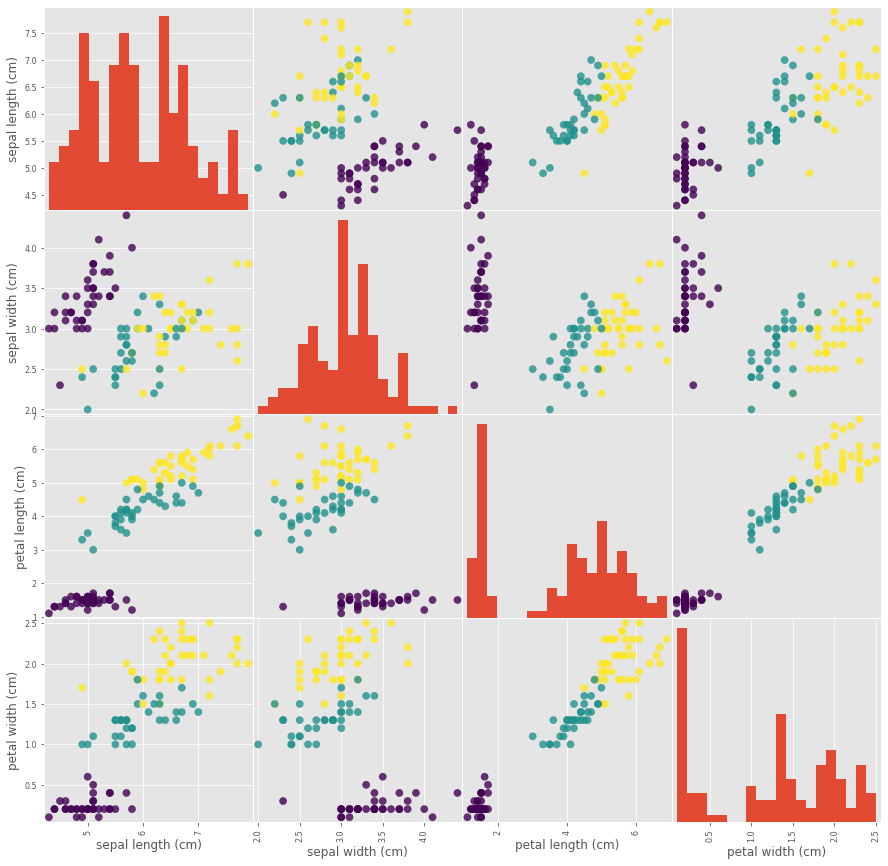

In [96]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr= pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                         hist_kwds={'bins': 20}, s=60, alpha=.8)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

**This algorithm we use to build the model from the training data as the algorithm to make predictions of data. It will only store the training set.**

In [98]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**having all the above data we can make a more accurate projection of the types of models in the iris flower.**

In [99]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [100]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


**this is where we will test the data and programs previously**

In [101]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [102]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


**We can also use the scoring method of the knn object as previously mentioned**

In [103]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


**También podemos utilizar el método de puntuación del knn Aquí ya podemos observar el procedimiento para poder obtener la suma total para tener la predicción más precisa del tipo de flor**

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
